# Introduction
***The*** ***Times Higher Education World University Ranking*** is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.
***The Academic Ranking of World Universities***, also known as the Shanghai Ranking, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.
***The Center for World University Rankings***, is a less well know listing that comes from Saudi Arabia, it was founded in 2012.
> (Harvard University)
> 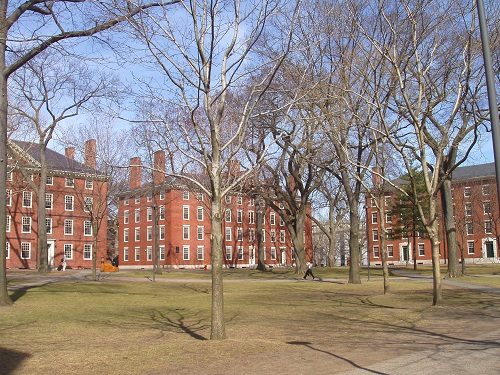                 
<font color = 'blue'>
    
Content:
1. [Import Necessary Libraries](#1)
2. [Load and Check Data](#2)
3. [Correlation Map](#3)
4. [Variable Description](#4)
  * [Matplotlib](#5)  
  * [Univariate Variable Analysis](#6) 
    * [Categorical Variable](#7)
    * [Numerical Variable](#8)
5. [Filtering](#9)
6. [List Comprehension](#10)
7. [Missing Data](#11)
8. [Outlier Detection](#12)

<a id = '1'></a>
## Import Necessary Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id = '2'></a>
## Load and Check Data
We have three different ranking system for universities. We will use and observe all of them.

***The Center for World University Rankings***

In [ ]:
cwurData = pd.read_csv('/kaggle/input/world-university-rankings/cwurData.csv')
print(cwurData.columns)
cwurData.head()

***The Academic Ranking of World Universities, also known as the Shanghai Ranking***

In [ ]:
shanghaiData = pd.read_csv('/kaggle/input/world-university-rankings/shanghaiData.csv')
print(shanghaiData.columns)
shanghaiData.head()

***The Times Higher Education World University Ranking***

In [ ]:
timesData = pd.read_csv('/kaggle/input/world-university-rankings/timesData.csv')
print(timesData.columns)
timesData.head()

<a id = '3'></a>
## Correlation Map
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cwurData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(shanghaiData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(timesData.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a id = '4'></a>
## Variable Description for The Times Higher Education World University Ranking
* world_rank
* university_name
* country	
* teaching
* international
* research
* citations
* income
* total_score
* num_students
* student_staff_ratio
* international_students
* female_male_ratio
* year

<a id = '5'></a>
## MATPLOTLIB
Matplot is a python library that help us to plot data. The easiest and most basic plots are line, scatter and histogram plots.

* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables
* Histogram is better when we need to see distribution of numerical data.
* Customization: Colors,labels,thickness of line, title, opacity, grid, figsize, ticks of axis and linestyle

In [ ]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
timesData.teaching.plot(kind = 'line', color = 'g',label = 'Teaching',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
timesData.research.plot(color = 'r',label = 'Research',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

In [ ]:
# Scatter Plot 
timesData.plot(kind='scatter', x='teaching', y='research',alpha = 0.5,color = 'red')
plt.xlabel('teaching')              # label = name of label
plt.ylabel('research')
plt.title('Scatter Plot')            # title = title of plot
plt.show()

In [ ]:
# Histogram
# bins = number of bar in figure
timesData.research.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [ ]:
timesData.info()

* float64(4): teaching, research, citations, and student_staff_ratio
* int64(1): year
* object(9): world_rank, university_name, country, international, income, total_score, num_student, international_students, and female_male_ratio

<a id = '6'></a>
## Univariate Variable Analysis
* Categorical Variable: country, international, university_name, world_rank
* Numerical Variable: teaching, research, citations, and student_staff_ratio

<a id = '7'></a>
### Categorical Variable

In [ ]:
def bar_plot(dataset, variable):
    """
        input: dataset ex:timesData, variable example: "country" or "university_name"
        output: bar plot & value count
    """
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
category1 = ["country", "international", "university_name", "world_rank"]
for c in category1:
    bar_plot(timesData,c)

<a id = '8'></a>
### Numerical Variable

In [ ]:
def plot_hist(dataset,variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [ ]:
numericVar = ["teaching", "research", "citations", "student_staff_ratio"]
for n in numericVar:
    plot_hist(timesData,n)

<a id = '9'></a>
## Filtering

In [ ]:
# 1 - Filtering Pandas data frame
x = shanghaiData['national_rank']=="1"
shanghaiData[x]

In [ ]:
# 1 - Filtering Pandas data frame
x = cwurData['citations']<5
cwurData[x]

In [ ]:
# 2 - Filtering pandas with logical_and
cwurData[np.logical_and(cwurData['quality_of_faculty']<20, cwurData['publications']<15 )]

In [ ]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
shanghaiData[(shanghaiData['total_score']>70) & (shanghaiData['alumni']>50)]

<a id = '10'></a>
## LIST COMPREHENSİON
We use list comprehension for data analysis often.
list comprehension: collapse for loops for building lists into a single line
Ex: num1 = [1,2,3] and we want to make it num2 = [2,3,4]. This can be done with for loop. However it is unnecessarily long. We can make it one line code that is list comprehension.

In [ ]:
# lets classify universities whether they have high or low teaching.
threshold = sum(timesData.teaching) / len(timesData.teaching)
timesData["ratio"] = ["high" if i > threshold else "low" for i in timesData.teaching]
timesData.loc[:10,["ratio","teaching"]] # we will learn loc more detailed later

<a id = '11'></a>
## MISSING DATA
If we encounter with missing data, what we can do:
* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean

In [ ]:
# Lets look at does cwurData data have nan value
# As you can see there are 2200 entries. However broad_impact has 2000 non-null object so it has 200 null object.
cwurData.info()

In [ ]:
# Lets check broad_impact
cwurData["broad_impact"].value_counts(dropna =False)
# As you can see, there are 200 NAN value

In [ ]:
# Lets drop nan values
cwurData["broad_impact"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
cwurData["broad_impact"].value_counts(dropna =False)

As you see there are no NaN values anymore

<a id = '12'></a>
## Outlier Detection

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
timesData.loc[detect_outliers(timesData,["research","teaching","citations"])]

There is no outlier

In [ ]:
timesData.boxplot(column="research",by = "year")
plt.show()